In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("/Users/mundogn/Documents/PythonW/vinos_clasificacion/wine.csv") 

In [3]:
data.head()

,Tipo,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X_train = data.values[:,range(1,14)]
data.values[:,range(1,14)]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

In [6]:
pca = PCA(n_components = 3)
X_3=principalComponents = pca.fit_transform(scaled_X)

In [7]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

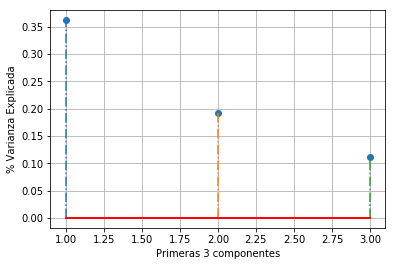

In [12]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 3 componentes')
plt.grid(True)
x = np.linspace(1, 3, 3)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [13]:
np.sum(pca.explained_variance_ratio_)

0.6652996889318528

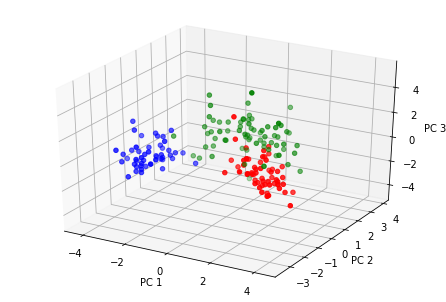

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green','blue']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=data.values[:,0], cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3,init= 'random',random_state=0).fit(X_3)
labels_pre=kmeans.labels_
labels_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [20]:
for i in range(178):
    if labels_pre[i]==0:
        labels_pre[i]=1
    elif labels_pre[i]==2:
        labels_pre[i]=2
    else:
        labels_pre[i]=3
labels_pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

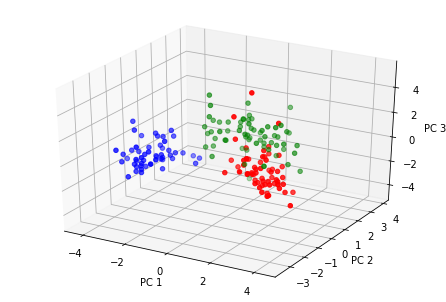

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green','blue']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=labels_pre, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(data.values[:,0],labels_pre)
accuracy

0.9662921348314607

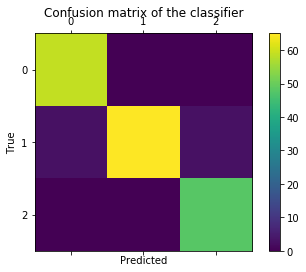

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(data.values[:,0],labels_pre)
labels = list(range(3))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3,linkage="ward").fit(X_3)
clustering.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
labels_pre_2=clustering.labels_
for i in range(178):
    if labels_pre_2[i]==1:
        labels_pre_2[i]=3
    elif labels_pre_2[i]==2:
        labels_pre_2[i]=1
    else:
        labels_pre_2[i]=2

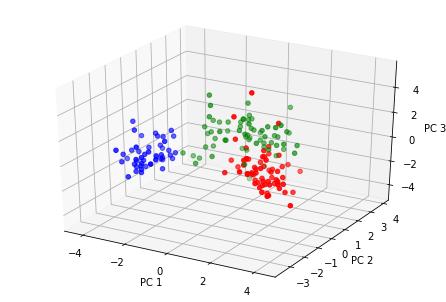

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green','blue']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=labels_pre_2, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [28]:
accuracy_2 = accuracy_score(data.values[:,0],labels_pre_2)
accuracy_2

0.949438202247191

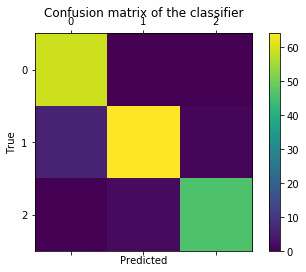

In [29]:
cnf_matrix = metrics.confusion_matrix(data.values[:,0],labels_pre_2)
labels = list(range(3))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()